# Supervised Learning: ReCell 

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

### Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

### Load data and make a copy

In [2]:
data = pd.read_csv('used_device_data.csv')
df = data.copy()
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


- There are 3454 data points.

### Data overview

In [3]:
df.shape

(3454, 15)

In [4]:
df.sample(15)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
1891,Micromax,Android,10.16,no,no,5.00,0.3,16.0,4.0,1750.0,146.5,2014,1050,3.629395,4.503027
2858,Vivo,Android,13.87,yes,no,14.50,16.0,128.0,4.0,4080.0,178.0,2016,840,4.683704,6.550652
736,Asus,Android,12.75,yes,no,13.00,5.0,32.0,4.0,4100.0,158.4,2016,599,4.388257,5.337826
1670,LG,Android,20.32,yes,no,5.00,5.0,16.0,4.0,2660.0,143.0,2016,574,4.405255,5.860986
1328,Huawei,Android,12.83,yes,no,16.00,8.0,32.0,4.0,3340.0,160.0,2016,707,4.859890,5.861669
2702,Sony,Android,10.31,yes,no,23.00,5.1,32.0,4.0,2700.0,138.0,2015,700,4.377391,5.312664
659,Apple,iOS,10.16,yes,no,12.00,1.2,16.0,4.0,1624.0,113.0,2016,894,4.437461,5.707841
2150,Oppo,Android,12.83,yes,no,13.00,16.0,64.0,4.0,3200.0,148.0,2017,648,4.677863,5.639422
2067,Nokia,Android,18.01,no,no,8.00,5.0,32.0,4.0,5300.0,318.0,2014,893,4.557449,5.771161
973,Coolpad,Android,12.83,yes,no,12.00,13.0,64.0,4.0,3200.0,152.0,2017,791,4.564348,5.859047


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- Data types don't need adjustment.
- There are missing values.

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 33 brands and a category 'others'.
- Majority of the devices run on Android.
- Most of them support 4G but not 5G.
- Specifications have a wide range because there are phones and tablets in the data.

In [7]:
df.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [8]:
df.duplicated().sum()

0

- No duplicates, but there are missing values in few of the columns.



### Exploratory Data Analysis (EDA)


In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<AxesSubplot:xlabel='normalized_used_price', ylabel='Count'>

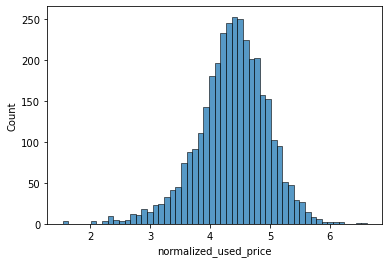

In [10]:
sns.histplot(data=df, x='normalized_used_price')

- The normalized used device prices are almost normally distributed.

<AxesSubplot:xlabel='normalized_new_price', ylabel='Count'>

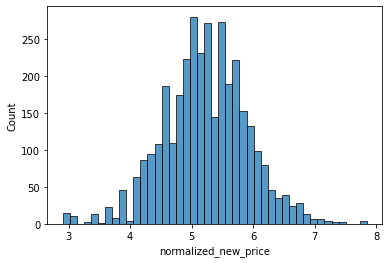

In [11]:
sns.histplot(data=df, x='normalized_new_price')

- It is also almost normally distributed.

<AxesSubplot:xlabel='screen_size', ylabel='Count'>

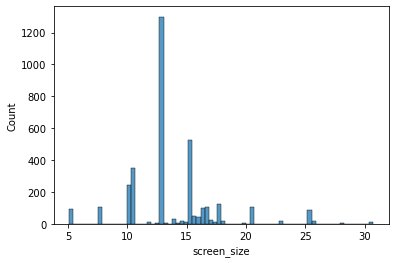

In [12]:
sns.histplot(data=df, x='screen_size')

- There are a few common sizes, around 10", 11", 13", and 15".

<AxesSubplot:xlabel='main_camera_mp', ylabel='Count'>

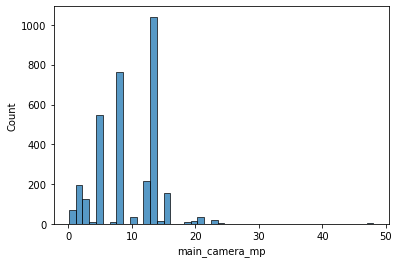

In [13]:
sns.histplot(data=df, x='main_camera_mp')

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='Count'>

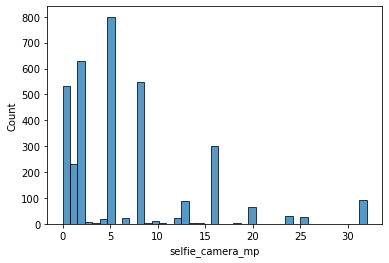

In [14]:
sns.histplot(data=df, x='selfie_camera_mp')

- Data is skewed
- Apply arcsinh transformation

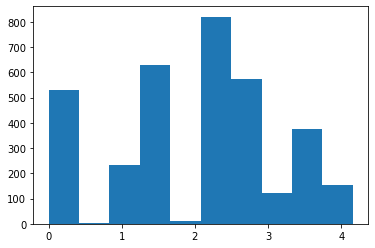

In [15]:
plt.hist(np.arcsinh(df['selfie_camera_mp']))
plt.show()

In [16]:
# dropping original column, creating arc column

df['selfie_camera_mp' + '_arc'] = np.arcsinh(df['selfie_camera_mp'])
df.drop('selfie_camera_mp', axis=1, inplace=True)

<AxesSubplot:xlabel='int_memory', ylabel='Count'>

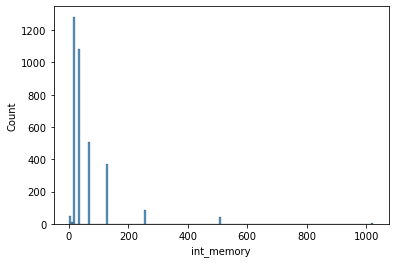

In [17]:
sns.histplot(data=df, x='int_memory')

<AxesSubplot:xlabel='ram', ylabel='Count'>

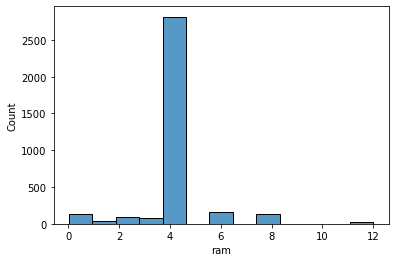

In [18]:
sns.histplot(data=df, x='ram')

<AxesSubplot:xlabel='battery', ylabel='Count'>

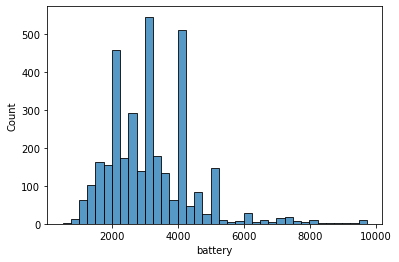

In [19]:
sns.histplot(data=df, x='battery')

<AxesSubplot:xlabel='weight', ylabel='Count'>

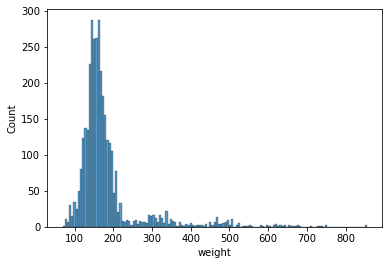

In [20]:
sns.histplot(data=df, x='weight')

- Column `weight` is skewed, will apply arcsinh transformation.

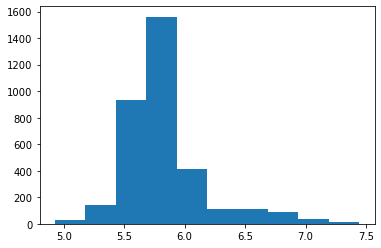

In [21]:
plt.hist(np.arcsinh(df['weight']))
plt.show()

In [22]:
df['weight' + '_arc'] = np.arcsinh(df['weight'])
df.drop('weight', axis=1, inplace=True)

<AxesSubplot:xlabel='days_used', ylabel='Count'>

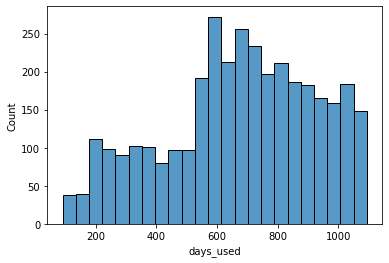

In [23]:
sns.histplot(data=df, x='days_used')

<AxesSubplot:xlabel='days_used'>

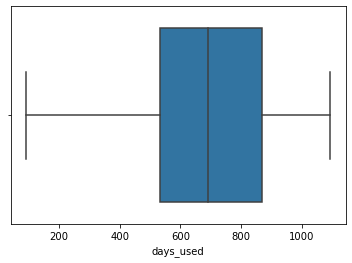

In [24]:
sns.boxplot(data=df, x='days_used')

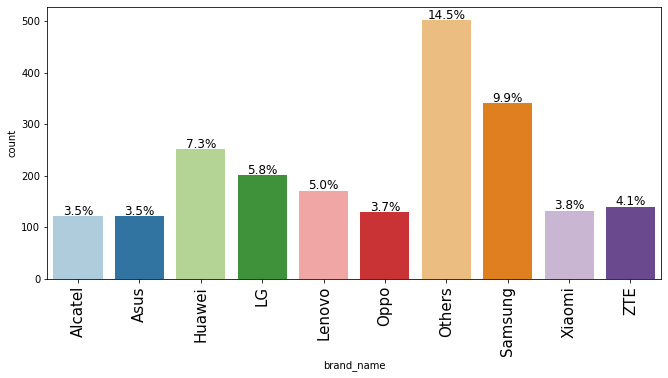

In [25]:
labeled_barplot(df, "brand_name", perc=True, n=10)

- Samnsung has the highest share, following by Huawei and LG. 

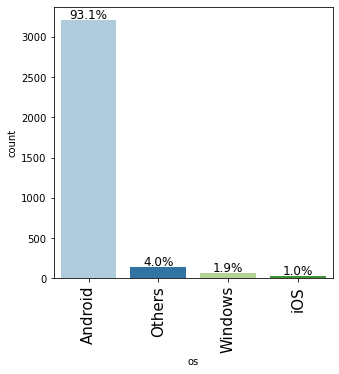

In [26]:
labeled_barplot(df, "os", perc=True)

- Android devices dominate the market. 

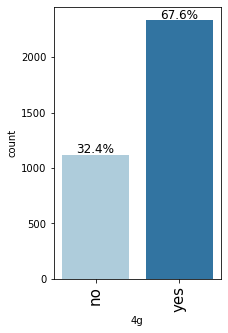

In [27]:
labeled_barplot(df, "4g", perc=True)

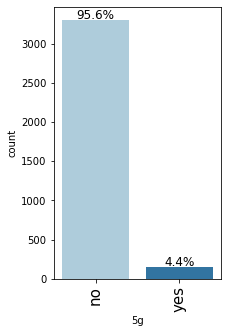

In [28]:
labeled_barplot(df, "5g", perc=True)

- Most phones have 4G but don't have 5G.

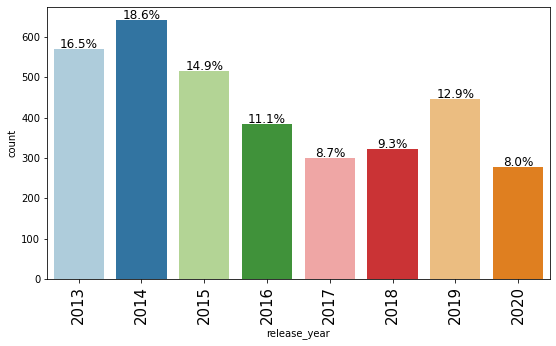

In [29]:
labeled_barplot(df, "release_year", perc=True)

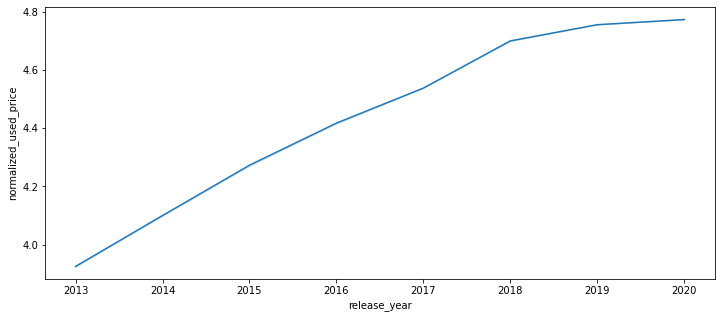

In [30]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=False)
plt.show()

- The price of used devices has increased over the years.

#### People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery (battery size of 4500 and over) and analyze.

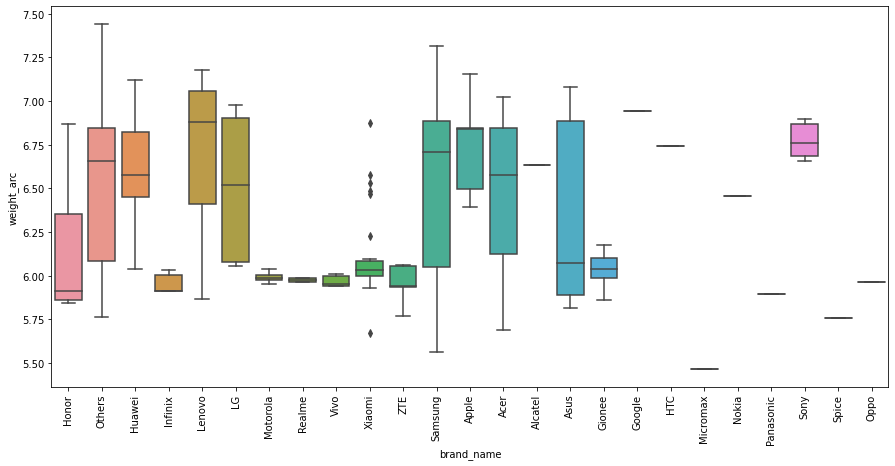

In [31]:
df_large_battery = df[df.battery > 4500]

plt.figure(figsize=(15, 7))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight_arc")
plt.xticks(rotation=90)
plt.show()

- iPhone's screen A lot of brands offer devices that are not very heavy but have a large battery capacity.
- Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
- Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavier.size is 

#### People who buy phones and tablets primarily for entertainment purposes prefer a large screen (screen size of 6*2.54 or larger) as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.

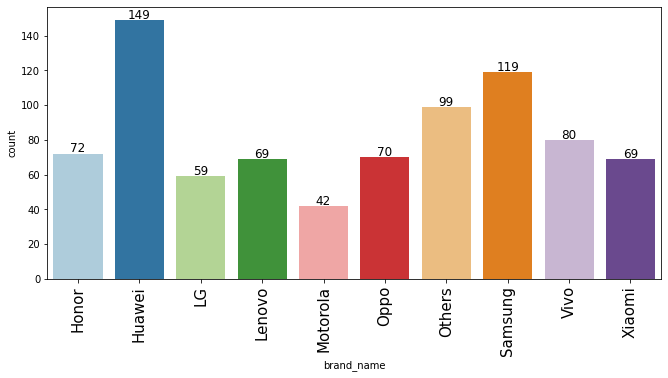

In [32]:
df_large_screen = df[df.screen_size > 6 * 2.54]

labeled_barplot(df_large_screen, "brand_name", n=10)

- Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.

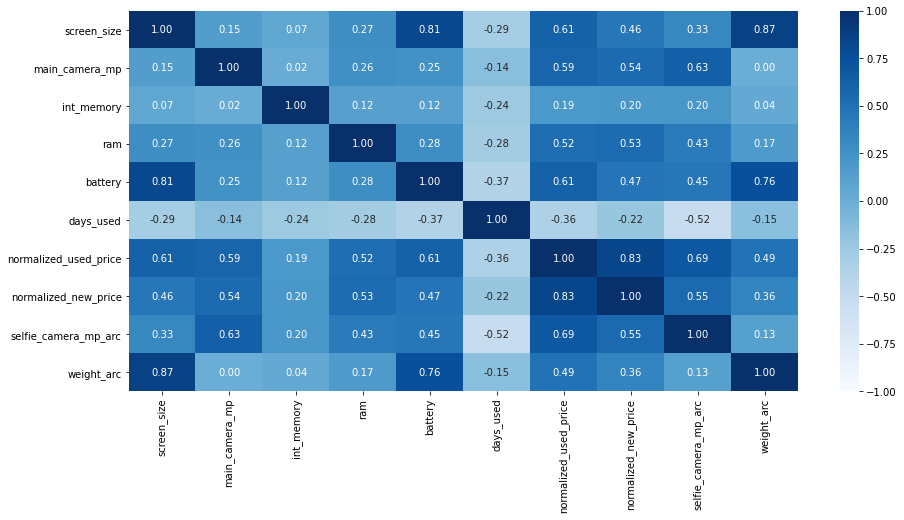

In [33]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues"
)
plt.show()

- Battery size, screen size, and weight are strongly correlated.

### Data Preprocessing


#### Missing value imputation

In [34]:
df1 = df.copy()
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
int_memory                 4
ram                        4
battery                    6
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
selfie_camera_mp_arc       2
weight_arc                 7
dtype: int64

In [35]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp_arc",
    "int_memory",
    "ram",
    "battery",
    "weight_arc",
]

for col in cols_impute:
    df1[col] = df1.groupby(['release_year', 'brand_name'])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [36]:
df1.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
int_memory                 0
ram                        0
battery                    6
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
selfie_camera_mp_arc       2
weight_arc                 7
dtype: int64

In [37]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp_arc",
    "battery",
    "weight_arc",
]

for col in cols_impute:
    df1[col] = df1.groupby(['brand_name'])[col].transform(
        lambda x: x.fillna(x.median())
    )

In [38]:
df1.isna().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
int_memory                0
ram                       0
battery                   0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
selfie_camera_mp_arc      0
weight_arc                0
dtype: int64

In [39]:
df1['main_camera_mp'] = df1['main_camera_mp'].fillna(df1['main_camera_mp'].median())

In [40]:
df1.isna().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
int_memory               0
ram                      0
battery                  0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
selfie_camera_mp_arc     0
weight_arc               0
dtype: int64

#### Feature Engineering

In [41]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

In [42]:
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,selfie_camera_mp_arc,weight_arc,years_since_release
0,Honor,Android,14.50,yes,no,13.0,64.0,3.0,3020.0,127,4.307572,4.715100,2.312438,5.676766,1
1,Honor,Android,17.30,yes,yes,13.0,128.0,8.0,4300.0,325,5.162097,5.519018,3.466711,6.054445,1
2,Honor,Android,16.69,yes,yes,13.0,128.0,8.0,4200.0,162,5.111084,5.884631,2.776472,6.054445,1
3,Honor,Android,25.50,yes,yes,13.0,64.0,6.0,7250.0,345,5.135387,5.630961,2.776472,6.866934,1
4,Honor,Android,15.32,yes,no,13.0,64.0,3.0,5000.0,293,4.389995,4.947837,2.776472,5.913510,1


#### Check for outlier

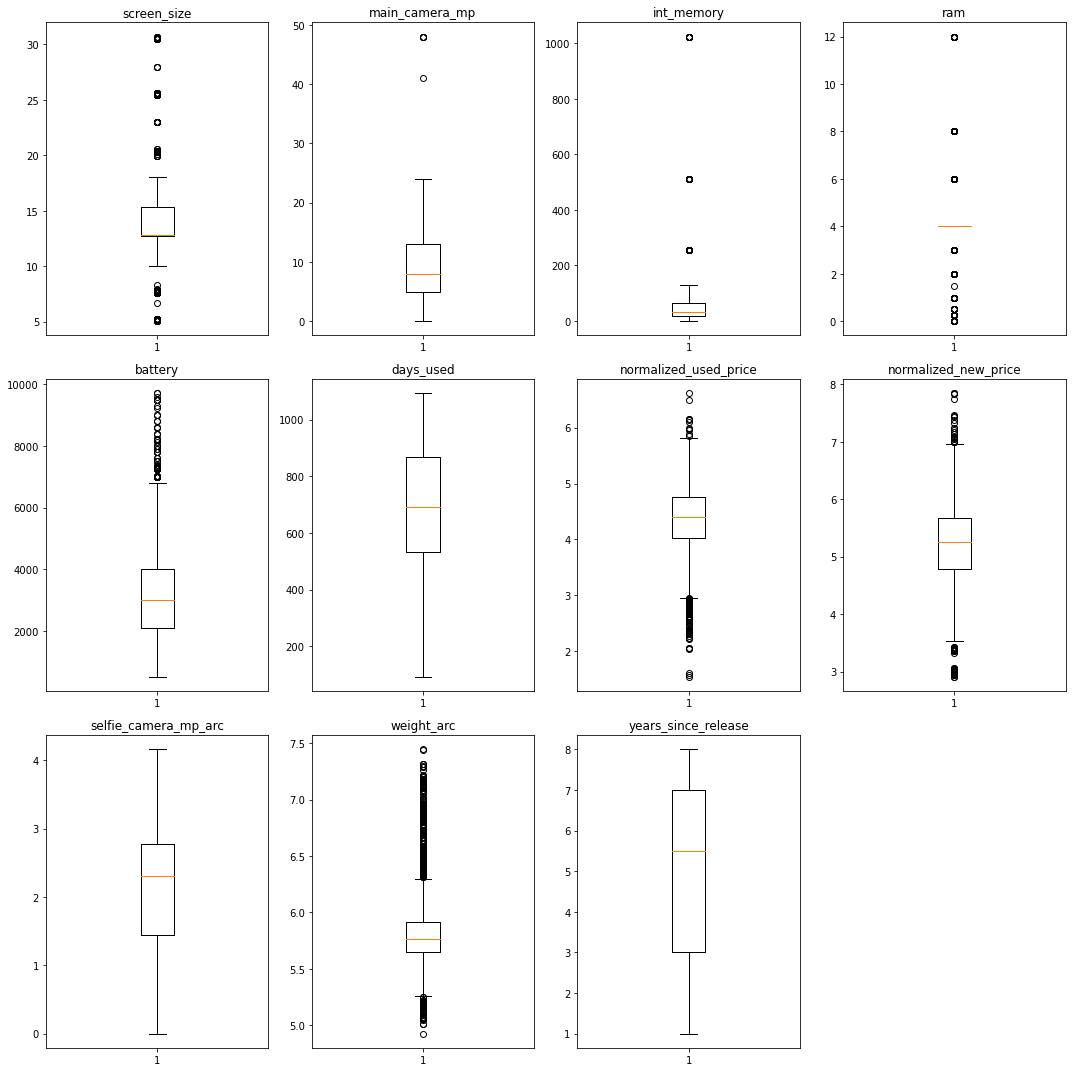

In [43]:
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data. However, we will not treat them because they are proper values.

### Building a Linear Regression model

In [44]:
x = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

In [45]:
x = pd.get_dummies(x, columns=x.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
x

,screen_size,main_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,selfie_camera_mp_arc,weight_arc,years_since_release,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,brand_name_BlackBerry,brand_name_Celkon,brand_name_Coolpad,brand_name_Gionee,brand_name_Google,brand_name_HTC,brand_name_Honor,brand_name_Huawei,brand_name_Infinix,brand_name_Karbonn,brand_name_LG,brand_name_Lava,brand_name_Lenovo,brand_name_Meizu,brand_name_Micromax,brand_name_Microsoft,brand_name_Motorola,brand_name_Nokia,brand_name_OnePlus,brand_name_Oppo,brand_name_Others,brand_name_Panasonic,brand_name_Realme,brand_name_Samsung,brand_name_Sony,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,64.0,3.0,3020.0,127,4.715100,2.312438,5.676766,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,128.0,8.0,4300.0,325,5.519018,3.466711,6.054445,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,128.0,8.0,4200.0,162,5.884631,2.776472,6.054445,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,64.0,6.0,7250.0,345,5.630961,2.776472,6.866934,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,64.0,3.0,5000.0,293,4.947837,2.776472,5.913510,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,15.34,13.0,64.0,6.0,5000.0,232,6.483872,2.776472,5.940178,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3450,15.24,13.0,128.0,8.0,4000.0,541,6.251538,2.776472,5.991471,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3451,15.80,13.0,32.0,3.0,4000.0,201,4.528829,2.312438,5.799102,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3452,15.80,13.0,32.0,2.0,4000.0,149,4.624188,2.312438,5.768331,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [46]:
x = sm.add_constant(x)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [48]:
model1 = sm.OLS(y_train, x_train).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     269.3
Date:                   Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                           21:41:36   Log-Likelihood:                 126.14
No. Observations:                   2417   AIC:                            -154.3
Df Residuals:                       2368   BIC:                             129.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


- Both the R-squared and Adjusted R squared of our model are greater than 0.8, we can move forward with it.

#### Model performance evaluation

In [49]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [50]:
print("\nTraining Performance\n")
model1_train_perf = model_performance_regression(model1, x_train, y_train)
model1_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229667,0.179934,0.845179,0.841974,4.313516


In [51]:
print("\nTest Performance\n")
model1_test_perf = model_performance_regression(model1, x_test, y_test)
model1_test_perf


Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.235061,0.183315,0.846807,0.839201,4.451509


- Performance of training and test sets are very close.
- RMSE, MAE, and MAPE are all very small numbers, which means the model does a pretty job predicting.

### Checking Linear Regression Assumptions


#### Test for Multicollinearity

In [52]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [53]:
checking_vif(x_train)

,feature,VIF
0,const,1264.432994
1,screen_size,7.107320
2,main_camera_mp,2.490967
3,int_memory,1.343253
4,ram,2.209605
5,battery,4.069621
6,days_used,2.643437
7,normalized_new_price,3.249790
8,selfie_camera_mp_arc,4.611770
9,weight_arc,6.188342


- Some of the numerical variables show high multicollinearity.

In [54]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [55]:
col_list = [
    "screen_size",
    "weight_arc",
    'years_since_release'
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.841362,0.232529
1,screen_size,0.839575,0.233834
2,weight_arc,0.835503,0.236783


In [56]:
col_to_drop = "years_since_release"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1264.411047
1,screen_size,7.033414
2,main_camera_mp,2.487574
3,int_memory,1.318883
4,ram,2.209355
5,battery,4.017164
6,days_used,1.853427
7,normalized_new_price,2.954074
8,selfie_camera_mp_arc,3.577059
9,weight_arc,6.164279


In [57]:
col_list = [
    "screen_size",
    "weight_arc",
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.839575,0.233834
1,weight_arc,0.835503,0.236783


In [58]:
col_to_drop = "screen_size"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,825.699724
1,main_camera_mp,2.487550
2,int_memory,1.318455
3,ram,2.208021
4,battery,3.680995
5,days_used,1.825636
6,normalized_new_price,2.947595
7,selfie_camera_mp_arc,3.535122
8,weight_arc,3.132711
9,brand_name_Alcatel,3.412373


Next I'll drop high p-vale

In [59]:
model2 = sm.OLS(y_train, x_train3).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     273.9
Date:                   Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                           21:41:37   Log-Likelihood:                 98.930
No. Observations:                   2417   AIC:                            -103.9
Df Residuals:                       2370   BIC:                             168.3
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [60]:

cols = x_train3.columns.tolist()   
max_p_value = 1

while len(cols) > 0:
    x_train_aux = x_train3[cols]  
    model = sm.OLS(y_train, x_train_aux).fit()
    p_values = model.pvalues
    max_p_value = max(p_values)
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'int_memory', 'ram', 'days_used', 'normalized_new_price', 'selfie_camera_mp_arc', 'weight_arc', 'brand_name_Karbonn', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [61]:
x_test4 = x_test3[selected_features]
x_train4 = x_train3[selected_features]

In [62]:
model3 = sm.OLS(y_train, x_train4).fit()
print(model3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1041.
Date:                   Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                           21:41:38   Log-Likelihood:                 75.746
No. Observations:                   2417   AIC:                            -125.5
Df Residuals:                       2404   BIC:                            -50.22
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [63]:
print("Training Performance\n")
model3_train_perf = model_performance_regression(model3, x_train4, y_train)
model3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234505,0.183651,0.838587,0.837713,4.418544


In [64]:
print("Test Performance\n")
model3_test_perf = model_performance_regression(model3, x_test4, y_test)
model3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23762,0.186123,0.843453,0.841463,4.536484


- Dropping those variables had no significant impact on the model performance.

#### Test for linearity and independence

In [65]:
df_pred = pd.DataFrame()
df_pred['actual_values'] = y_train
df_pred['fitted_values'] = model3.fittedvalues
df_pred['residuals'] = model3.resid

df_pred

,actual_values,fitted_values,residuals
3026,4.087488,3.732674,0.354813
1525,4.448399,4.676111,-0.227712
1128,4.315353,4.354329,-0.038977
3003,4.282068,4.203390,0.078678
2907,4.456438,4.491041,-0.034603
...,...,...,...
2763,4.009513,4.079081,-0.069568
905,4.231785,3.926543,0.305242
1096,4.743279,4.678161,0.065117
235,5.180209,4.902211,0.277998


<AxesSubplot:xlabel='fitted_values', ylabel='residuals'>

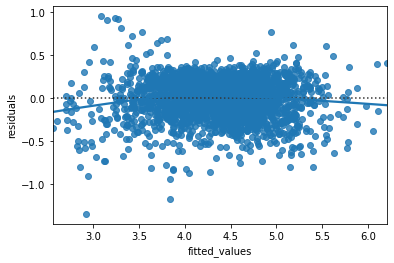

In [66]:
sns.residplot(data=df_pred, x='fitted_values', y='residuals', lowess=True)

- We see no pattern in the plot above. Therefore, the assumptions of linearity and independence are satisfied.

#### Test for normality

<AxesSubplot:xlabel='residuals', ylabel='Count'>

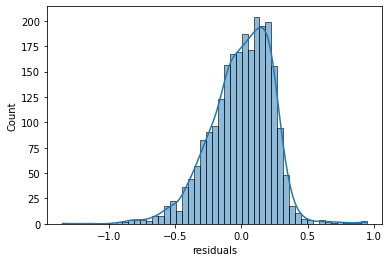

In [67]:
sns.histplot(data=df_pred, x='residuals', kde=True)

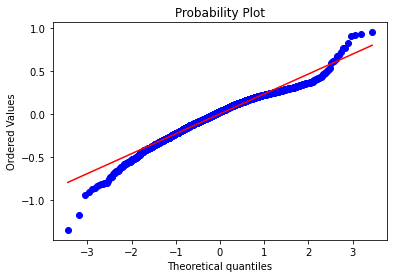

In [68]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["residuals"], dist="norm", plot=pylab)
plt.show()

In [69]:
stats.shapiro(df_pred["residuals"])

ShapiroResult(statistic=0.9704380631446838, pvalue=6.426324981452558e-22)

- P-value is less than 0.05, the residuals are not normally distributed per Shapiro-Wilk test.
- However, based on the graphs, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

#### Test for homoscedasticity

In [70]:
import statsmodels.stats.api as sms
test = sms.het_goldfeldquandt(df_pred["residuals"], x_train4)
test

(1.0596952756557019, 0.15814411117561963, 'increasing')

- P-value > 0.05, the residuals are homoscedastic. So, the assumption is satisfied.
- All the assumptions are satisfied. I'll rebuild final model and check its performance.

In [71]:
final_mod = sm.OLS(y_train, x_train4).fit()
print(final_mod.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1041.
Date:                   Tue, 07 Mar 2023   Prob (F-statistic):               0.00
Time:                           21:41:40   Log-Likelihood:                 75.746
No. Observations:                   2417   AIC:                            -125.5
Df Residuals:                       2404   BIC:                            -50.22
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Compare performance

In [72]:
print("Training Performance\n")
final_mod_train_perf = model_performance_regression(final_mod, x_train4, y_train)
final_mod_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234505,0.183651,0.838587,0.837713,4.418544


In [73]:
print("Test Performance\n")
final_mod_test_perf = model_performance_regression(final_mod, x_test4, y_test)
final_mod_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23762,0.186123,0.843453,0.841463,4.536484


In [74]:
models_train_comp_df = pd.concat(
    [model1_train_perf.T, final_mod_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.229667,0.234505
MAE,0.179934,0.183651
R-squared,0.845179,0.838587
Adj. R-squared,0.841974,0.837713
MAPE,4.313516,4.418544


In [75]:
models_test_comp_df = pd.concat(
    [model1_test_perf.T, final_mod_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (all variables)",
    "Linear Regression (selected variables)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (all variables),Linear Regression (selected variables)
RMSE,0.235061,0.237620
MAE,0.183315,0.186123
R-squared,0.846807,0.843453
Adj. R-squared,0.839201,0.841463
MAPE,4.451509,4.536484


### Insights and Recommendations

#### Insights
- Weight of the device has the biggest impact on pricing. Because weight, screen size, and battery size are strongly correlated, it's safe to say weight, screen size, and battery size have the biggest impact on pricing. 
- A unit increase in weight will result in a 0.4656 unit increase in the normalized used device price, all other variables held constant.
- Another huge factor is the price of the new device. 
- A unit increase in the normalized new model price will result in a 0.3998 unit increase in the normalized used device price, all other variables held constant.

#### Recommendations
- All metrics show that the model has pretty good performance. It can be used for predictive purposes.
- To help generate higher revenue, the company should focus on devices that have higher new price, heavier weight, bigger battery size, and bigger screen. 
- Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different price points.
- It will be a good idea to look into selling other used gadgets, like smart watches.